# P1: Test a Perceptual Phenomenon
## The Stroop Effect

**Question 1:** Identify the independent and dependent variables in the experiment.

The _independent_ variable in this experiment is the condition which can be set as "congruent" (i.e., the first test where the color of the word matches what the text suggests) or "incongruent" (i.e., the second test where the color of the word does not match what the text suggests). The _depedent variable_ is the performance on the test (i.e., amount of time it takes to name, out loud, the color of the inks in which the words are displayed) under the aforementioned conditions (measured in seconds). 

**Question 2:** Establish the null and alternative hypotheses. Determine and justify the appropriate statistical test.

The _null_ hypothesis (H<sub>0</sub>) is that there is no difference in the population mean performance between the two conditions. The _alternative_ hypothesis (H<sub>a</sub>) is that there is a difference in the population mean performance between the two conditions. Expressing this using conventional notation:

$$H_{0}: \mu_{congruent} - \mu_{incongruent} = 0$$
$$H_{a}: \mu_{congruent} - \mu_{incongruent} \neq 0$$

I believe that the appropriate statistical test for this experiment is a **paired-samples t-test** (also called a **dependent t-test for paired samples**) because the population parameters for expected value and standard deviation are unknown and each datapoint represents the same individual having undergone both conditions. The selection of the hypotheses above indicated a two-tailed test because I'm not familiar with this phenomena and cannot predict _a priori_ a particular direction, but I do think they differences in the means is non-zero given my own performance differential taking the test under the two conditions.

**Question 3:** Report some descriptive statistics regarding this dataset, including at least one measure of central tendency and at least one measure of variability.

> **Note:** I decided to use Python and Jupyter Notebook to help me run the calculations required to execute the paired-samples t-test. I also employed a variety of modules to achieve these same ends to double-check that my process was correct. Plus, this served as a great learning opportunity since I'm pretty new to programming and the subsequent parts of the course call on these tools!

In [19]:
# These were the modules I used:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

# Plots inline rather than opening a new window
%matplotlib inline

First, I needed to import the data and make the columns manipulable; this was achieved using the code below.

In [20]:
# Open the provided CSV file and extract the data
with open("stroopdata.csv", "rb") as f:
    reader = csv.DictReader(f)
    data_table = list(reader)

# Turn extracted data into two numpy arrays
congruent_list = []
incongruent_list = []
for data_point in data_table:
    congruent_list.append(float(data_point['Congruent']))
    incongruent_list.append(float(data_point['Incongruent']))

congruent_array = np.array(congruent_list)
incongruent_array = np.array(incongruent_list)

data_table_list = [congruent_array, incongruent_array]

Then, I generated the descriptive statistics for each column using the functions included in NumPy.

In [21]:
i = 0
for condition in data_table_list:
    mean = np.mean(condition)
    median = np.median(condition)
    variance = np.var(condition, ddof=1)
    std_dev = np.std(condition, ddof=1)
    conf_int = stats.norm.interval(0.95, loc=mean, scale=std_dev/math.sqrt(len(condition)))
    i = i + 1
    if i == 1:
        print 'The following statistics describe performance under the Congruent condition for our sample:'
    else:
        print 'The following statistics describe performance under the Incongruent condition for our sample:'
    print(
        'Mean: %6.5f' % mean,
        'Median: %6.5f' % median,
        'Variance: %6.5f' % variance,
        'Standard Deviation: %6.5f' % std_dev,
        '95%% CI: (%6.5f, %6.5f)' % conf_int
    )


The following statistics describe performance under the Congruent condition for our sample:
('Mean: 14.05112', 'Median: 14.35650', 'Variance: 12.66903', 'Standard Deviation: 3.55936', '95% CI: (12.62711, 15.47514)')
The following statistics describe performance under the Incongruent condition for our sample:
('Mean: 22.01592', 'Median: 21.01750', 'Variance: 23.01176', 'Standard Deviation: 4.79706', '95% CI: (20.09673, 23.93510)')


> **Note:** When I perform the t-test a little later, I will be computing similar figures for the differences of each paired data point (i.e., a given individual's "Incongruent" score subtracted from his/her "Congruent" score).

**Question 4:** Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

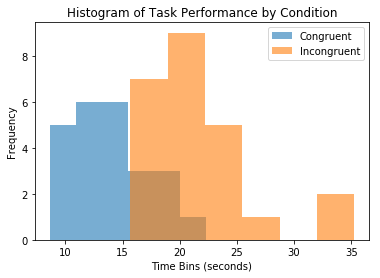

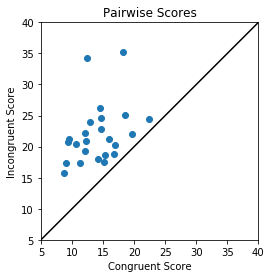

In [22]:
# Histogram of the data
plt.hist(data_table_list[0], bins='auto', alpha=0.6, label='Congruent')
plt.hist(data_table_list[1], bins='auto', alpha=0.6, label='Incongruent')

plt.title('Histogram of Task Performance by Condition')
plt.ylabel('Frequency')
plt.xlabel('Time Bins (seconds)')
plt.legend()
plt.show()

# Scatter plot where each point is a person and their (x, y) values are 
# their (congruent, incongruent) times, respectively.
plt.scatter(congruent_array, incongruent_array)
plt.xlim(5,40)
plt.ylim(5,40)

# Create an identity line for the scatter plot
x=np.linspace(0,50)
plt.plot(x,x,'k-')
plt.title('Pairwise Scores')
plt.xlabel('Congruent Score')
plt.ylabel('Incongruent Score')

# Sets the canvas to be a square
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

The first plot is a histogram of both the "Congruent" and "Incongruent" scores. It's clear from this plot that the Incongruent scores (measured in seconds) are, on the whole, greater than the Congruent scores. Interestingly, the shapes of the two distributions are also very similar.

The scatter plot is quite telling&#8212;we see that _every_ member of our sample does worse on the "Incongruent" test relative to his/her performance on the "Congruent" test. This seems to confirm the intuition developed by taking the Stroop tests myself, as my performance was also significantly worse on the "Incongruent" test. 

Furthermore, the box-and-whisker plot below does a good job displaying the demonstrable differences in the test subjects' performance under the two conditions.

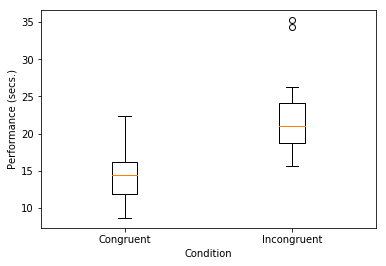

In [23]:
plt.figure()
plt.boxplot(data_table_list)
plt.xticks([1, 2], ['Congruent', 'Incongruent'])
plt.xlabel("Condition")
plt.ylabel("Performance (secs.)")

plt.show()

**Question 5:** Perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [24]:
# Create a column consisting of the paired differences
differences_array = np.subtract(congruent_array, incongruent_array)

# Compute the different values needed to perform 2-tailed t-test
mean_differences = np.mean(differences_array)
print 'The mean of the differences is %6.5f.' %mean_differences
std_dev_differences = np.std(differences_array, ddof=1)
print 'The standard deviation of the differences is %6.5f.' %std_dev_differences
standard_error = std_dev_differences / math.sqrt(len(data_table))
print 'The standard error of the mean differences is %6.5f.' %standard_error
conf_int_differences = stats.norm.interval(0.95, loc=mean_differences, scale=std_dev_differences/math.sqrt(len(differences_array)))
print 'The 95%% CI for the mean differences is (%6.5f, %6.5f).' %conf_int_differences
DoF_ttest = len(data_table) - 1
print 'Note that the degrees of freedom for this test is %.0f.' %DoF_ttest

# Compute the t-statistic
t_stat = mean_differences / standard_error
print 'The t-statistic is %6.5f.' %t_stat

# Find the t-critical value for a 2-tailed t-test at alpha = 0.5 using SciPy.
# The argument for the t-critical value function takes 2.5% because we're doing a 2-tailed test.
t_critical = stats.t.isf([0.025], DoF_ttest)
print 'The t-critical value is %6.5f.' %t_critical

# Determine whether to retain or reject the null hypothesis
print 'For alpha = 0.5 for a two-tail t-test, we can...'
if abs(t_stat) > abs(t_critical):
    print '...reject the null hypothesis'
else:
    print '...retain the null hypothesis'

The mean of the differences is -7.96479.
The standard deviation of the differences is 4.86483.
The standard error of the mean differences is 0.99303.
The 95% CI for the mean differences is (-9.91109, -6.01849).
Note that the degrees of freedom for this test is 23.
The t-statistic is -8.02071.
The t-critical value is 2.06866.
For alpha = 0.5 for a two-tail t-test, we can...
...reject the null hypothesis


To check my answer, I used the corresponding, built-in t-test function contained in the SciPy module:

In [25]:
print 'The t-statistic is %.5f; the p-value is %.5f.' % stats.ttest_rel(congruent_array, incongruent_array)

The t-statistic is -8.02071; the p-value is 0.00000.


## Conclusion

These results are consistent with my initial hunch (informed by my own experience taking the test and reflected in the null hypothesis) that the means of the times under the two conditions would be materially different. In fact, we can say that difference in the means is _statistically significant_ at for $\alpha = 0.05$ and that the null hypothesis outlined earlier is to be rejected since $ p < \alpha$, where $p$ denotes the p-value.  

**Question 6:** Hypotheses regarding the reasons for the effect observed are presented. An extension or related experiment to the performed Stroop task is provided, that may produce similar effects.

My guess is that the processing to required to properly handle the inputs (e.g., `PURPLE` in red ink) is in conflict in someway, which the brain then has to reconcile, before rendering the output (i.e., saying "red"). In the context of this specific task, one process at work is recognizing and comprehending the text itself while the another, different process is recognizing and associating the color. When these give conflicting results, additional processing yields a slower response. 

One possible way to replicate this test would be to have a "stoplight" of sorts with the text `GO` and `STOP` at first (hence, "Congruent" condition) corresponding to the correct associated colors (e.g., [green, red] in the United States for [`GO`, `STOP`], respectively). The "Incongruent" condition would have the text displayed with the opposite color. Participants could take a step (or move) following the correct directions (contained in the text, NOT the color). Errors could then be counted in a similar fashion to the Stroop task.  

## References

* Udacity _Introduction to Data Analysis_ course, ["CSVs in Python"](https://classroom.udacity.com/courses/ud170/lessons/5430778793/concepts/53961386130923#)
* Various documentation:
 * [SciPy, Numpy](https://docs.scipy.org/)
 * [matplotlib](http://matplotlib.org/api/index.html)
* StackExchange